<a href="https://colab.research.google.com/github/kimzn4230/aideeplearning/blob/main/_%EC%A1%B1%EB%B3%B4_mid_term_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Deep Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :)


In [ ]:
import tensorflow as tf


## Q1 Mnist data

We will use Mnist dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs (train_images) and targets (train_labels) for training.
  - [5] Reshape the train_images and test_images data, the 2nd and 3rd dimension should be flattened. ( (28,28) dimension becomes 784 )
  - [5] Divide train_images and test_images by 255, so that the data ranges between 0 and 1.  

In [ ]:
## Code here
train_images.shape

(60000, 28, 28)

In [ ]:
## Code here
train_labels.shape

(60000,)

In [ ]:
# Code here

train_images = train_images.reshape((60000,28*28)) ## code for reshape
train_images = train_images.astype('float32')/255 ## code for normalize
test_images = test_images.reshape((10000, 28*28)) ## code for reshape
test_images = test_images.astype('float32')/255 ## code for normalize

In [ ]:
train_images.shape

(60000, 784)

#### (Q1-2) [10 points] Design a simple neural network model using three dense layers.
  - Two hidden dense layers have dimension of 50 and 30 with a relu activation.
  - Define final dense layer with the proper activation for multi-class outputs.
  - Build your model and check summary output. Summary output should look like below.
  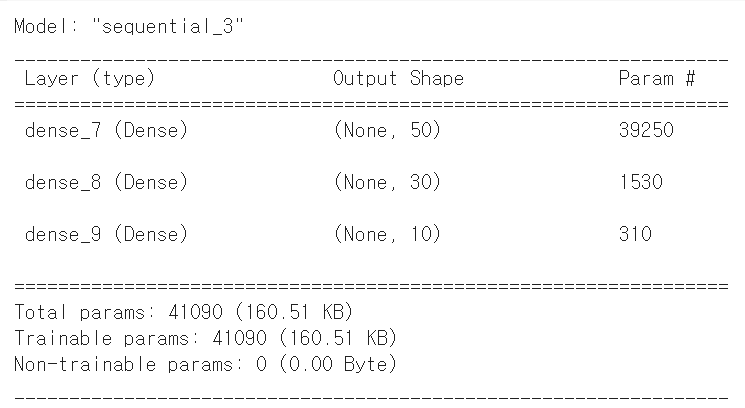

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(50, activation='relu',input_shape=(784,)),
    layers.Dense(30, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 아니면 위에서 input shape 안 쓰고 싶으면
# model.build((None,784)), model.summary() 이렇게 두 개 실행

In [ ]:
## Build your model and print summary output
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,090 (160.51 KB)

 Trainable params: 41,090 (160.51 KB)

 Non-trainable params: 0 (0.00 B)

#### (Q1-3) [10 points] Compile and fit your model.
 - [5] Set optimizer as 'SGD', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 8 number of epochs with batch size 50. Specify validation data as (test_images, test, labels)

In [ ]:

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"]
                )


In [ ]:

history = model.fit(train_images, train_labels, epochs=8, batch_size=50,
                    validation_data=(test_images, test_labels))


Epoch 1/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5819 - loss: 1.3887 - val_accuracy: 0.8865 - val_loss: 0.4180
Epoch 2/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8852 - loss: 0.4039 - val_accuracy: 0.9110 - val_loss: 0.3178
Epoch 3/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9078 - loss: 0.3227 - val_accuracy: 0.9231 - val_loss: 0.2809
Epoch 4/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9172 - loss: 0.2854 - val_accuracy: 0.9284 - val_loss: 0.2541
Epoch 5/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9267 - loss: 0.2596 - val_accuracy: 0.9335 - val_loss: 0.2343
Epoch 6/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9336 - loss: 0.2345 - val_accuracy: 0.9370 - val_loss: 0.2157
Epoch 7/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9386 - loss: 0.2179 - val_accuracy: 0.9401 - val_loss: 0.2009
Epoch 8/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9427 - loss: 0.2005 - val_accu

## Q2 Youtube reply data.

Let's create a spam detection model, a simple binary classification model! :)

It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.


Here are some codes to download and prepare data.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
youtube_spam_collection = fetch_ucirepo(id=380)

# data (as pandas dataframes)
X = youtube_spam_collection.data.features.copy()
y = youtube_spam_collection.data.targets.copy()


Codes for some preprocessing.

In [ ]:
# Some preprocessing

import re
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'http\S+', ' http', x))    ## replace http something -> http
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'\S+.?\S+.\S[3]', ' http', x))    ## replace xxx.xxx.xxx -> http
X.iloc[:, 2] = X.iloc[:, 2].apply(lambda x: re.sub(r'(\\|%|\[|\]|!|\?|#|&)\S+', ' ---', x)) ## words starting with \, %, [, ], !, & or ? -> '---'
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: x.lower())


Randomly shuffle data using pre-defined idx.

In [ ]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 39.2MB/s]


In [ ]:
import numpy as np
import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  _, _, _, _, _, _, idx = record1

X_shuffled = X.iloc[idx, 2]
y_shuffled = y.iloc[idx]

Check first 10 sampels

In [ ]:
## Targets

X_shuffled[:10]

,CONTENT
1778,stop wasting up your time and get paid to mes...
1936,love this song ---
1928,"hello everyone, it is not my intention to spam..."
1102,check out this funny video --- box knocks out...
1729,....i stil lisening this :)﻿
891,this is so http9;t i heard this before ---
1586,nice song﻿
406,"i love this song, it´s for empowering every wo..."
177,http
887,check out this video on youtube:﻿


In [ ]:
## Labels, 0: normal, 1:spam

y_shuffled[:10]

,CLASS
1778,1
1936,0
1928,1
1102,1
1729,0
891,0
1586,0
406,0
177,1
887,1


In [ ]:
## Count words so that we use most frequent words to use Bag of Words feature.

word_counts = {}
for row in X_shuffled:
    for word in row.split():
        word_counts[word] = word_counts.get(word, 0) + 1

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

sorted_words = [word for word, count in sorted_word_counts.items() if count >= 10]


In [ ]:
word_index = dict( [  (str1, i) for i, str1 in enumerate(sorted_words) ] )
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# word_index = { 'thanks': 0, 'for': 1, 'watching': 2, 'subscribe': 3, ... } 형식의 단어를 숫자로 바꿔주는 딕셔너리

word_index = { 'thanks': 0, 'for': 1, 'watching': 2, 'subscribe': 3, ... } 는 형식의 단어를 숫자로 바꿔주는 딕셔너리

예를 들어 sorted_words = ["thanks", "for", "watching", "subscribe"] 라면

문장 "thanks for watching"은 [1, 1, 1, 0]  벡터가 된다.← subscribe는 없으니까 0

Split data as train, validation and test sets

In [ ]:
X_train = X_shuffled[:1000]
y_train = y_shuffled[:1000]

X_val = X_shuffled[1000:1500]
y_val = y_shuffled[1000:1500]

X_test = X_shuffled[1500:]
y_test = y_shuffled[1500:]

#### (Q2-1) [10 points] Make a vectorize_sequences function just like chapter 4.
 - `sorted_words` is a list of most frequent words used in the reply. `word_index` and `reverse_word_index` are index to word or word to index mapping information for the words.
 - Input is sequences like X_train, X_val and X_test.
 - Modify the code below.

Codes from chapter 4 is below for your referecne. You have to modify the below function. Be careful, this time input is words not integers. You have to modify accordingly.

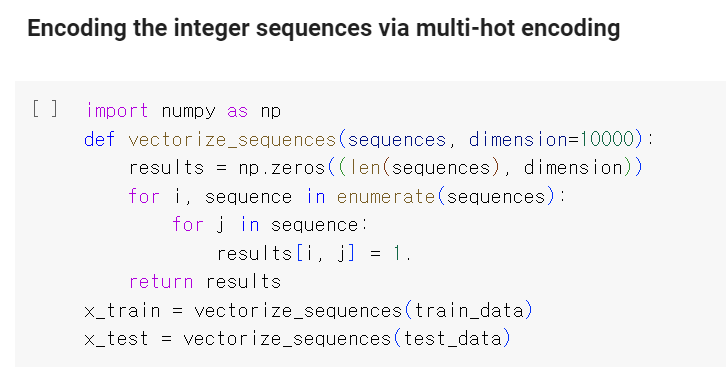

In [ ]:
## Modify function below

def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension)) # 결과 벡터: 전부 0으로 시작

    for i, sequence in enumerate(sequences): # 각 문장(댓글)에 대해
        for word in sequence.split(): # 단어 하나하나 꺼내서(문장을 단어로 쪼)
            index = word_index.get(word) # 단어에 해당하는 숫자 인덱스 가져오고
            if index is not None and index < dimension: # 인덱스가 유효하면
              results[i, index] = 1. # 해당 위치에 1 표시(존재한다는 뜻)
    return results

In [ ]:
## get features using vectorize_sequences funtion that you defined

x4train = vectorize_sequences(X_train, dimension= len(sorted_words))
x4val = vectorize_sequences(X_val, dimension= len(sorted_words))
x4test = vectorize_sequences(X_test, dimension= len(sorted_words))

If you wrote the code correctly, the first output result of the training set will be same as below.

If there is something wrong, it may have all zeros.

In [ ]:
x4train[0]

array([0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### (Q2-2) [10 points] Design a simple neural network model using four dense layers.
  - Try to use Functional API of keras, not sequential one.
  - Three hidden dense layers have dimension of 36, 20 and 10 with a relu activation.
  - Define final dense layer with the proper activation for binary classification output.
  - Model should look like below.

  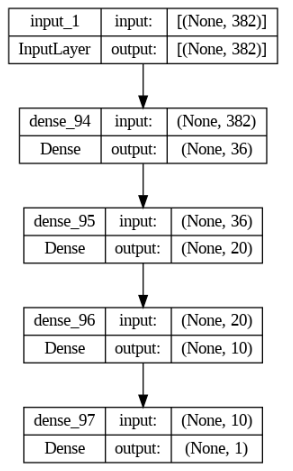


If you cannot solve problem Q2-1, run the code below to receive the preprocessed data and then solve the problem.

In [ ]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 42.3MB/s]


In [ ]:
## Loading correct x4train, x4val, x4test, y_train, y_val, y_test datasets.

import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  x4train, x4val, x4test, y_train, y_val, y_test, idx = record1


만약 시퀀셜 방법으로 한다면 아래와 같음

In [ ]:
## your code here
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid") # 출력층: 이진분류는 1 & sigmoid
])


그치만 문제에서 functional api 써야함, 아래가 정답에 해당

In [ ]:
## Define your model using Functional API

inputs = keras.Input(shape=(len(word_index),)) # Input(shape=(382,))도 가능하

hidden1 = layers.Dense(36, activation='relu')(inputs)
hidden2 = layers.Dense(20, activation='relu')(hidden1)
hidden3 = layers.Dense(10, activation='relu')(hidden2)

outputs = layers.Dense(1, activation='sigmoid')(hidden3)

model = keras.Model(inputs=inputs, outputs=outputs)

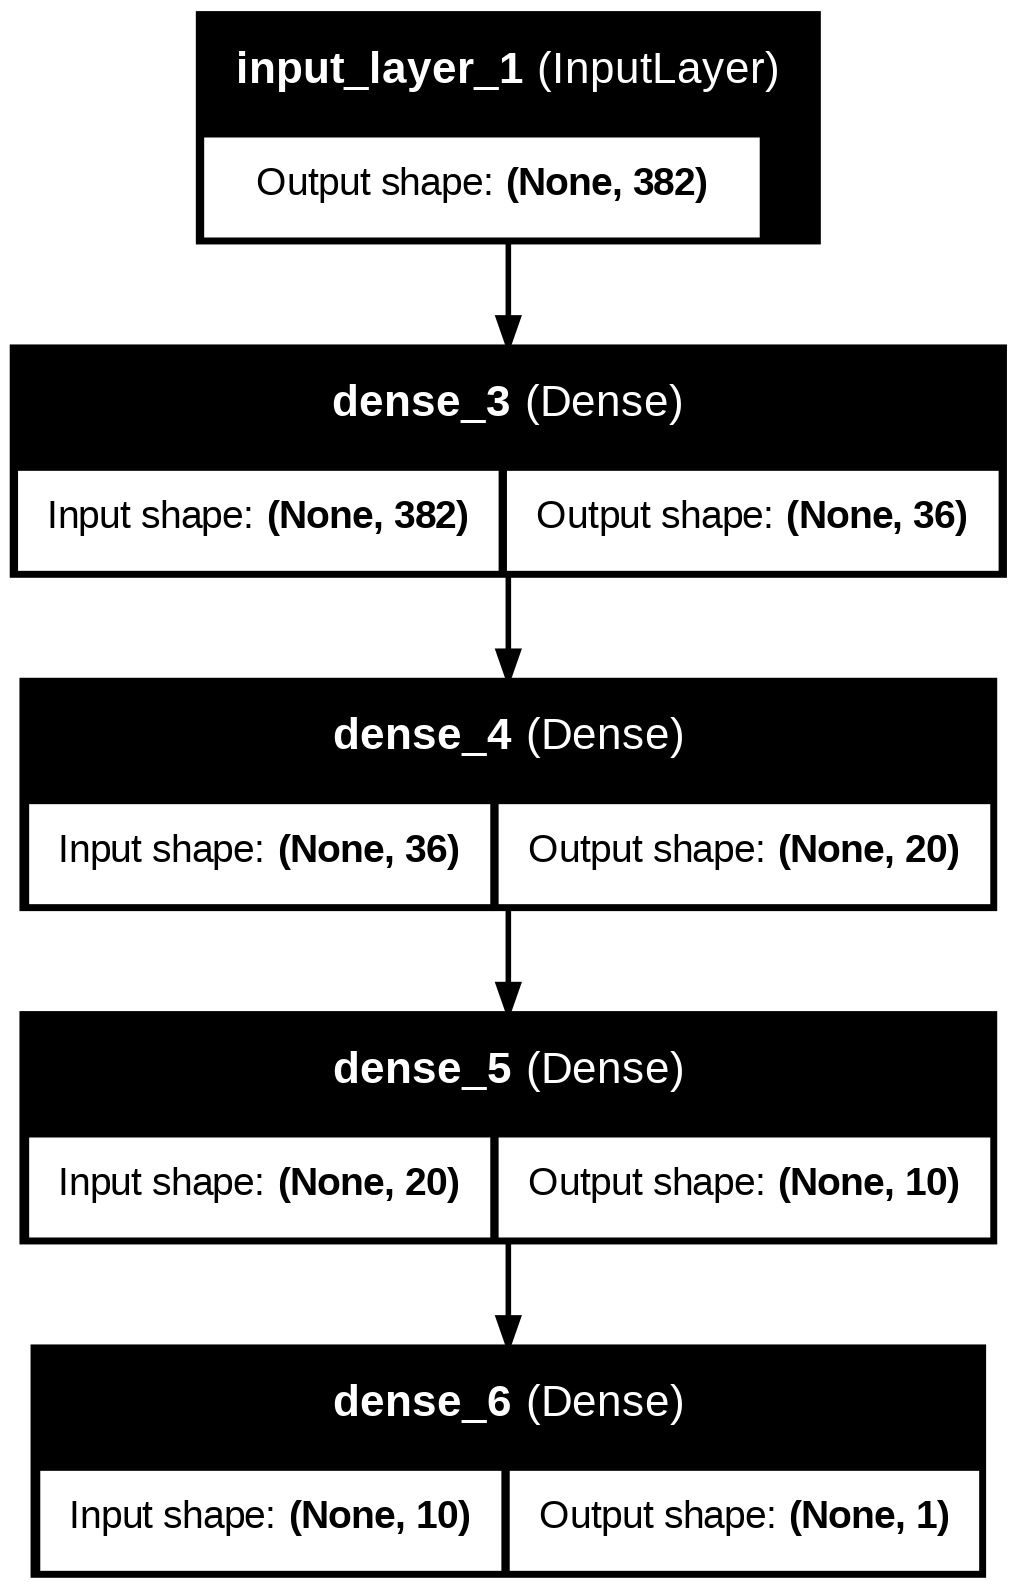

In [ ]:
keras.utils.plot_model(model, 'spam_classifier_with_shape_info.png', show_shapes=True, show_layer_names=True)

#### (Q2-3) [15 points] Compile and fit your model.

 - [5] Set optimizer as 'rmsprop', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 50 number of epochs with batch size 20. Specify validation data as (X4val, y_val)
 - [5] Evaluate your model using X4test and y_test. Report evaluation accuracy for test dataset.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', # 이진분류 loss
              metrics=['accuracy']
               )

In [ ]:
history = model.fit(x4train, y_train, epochs=50, batch_size=20,# 학습이니까 train
                    validation_data=[x4val,y_val] # 학습 때 val data도 쓰래
                    )

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6186 - loss: 0.6641 - val_accuracy: 0.6560 - val_loss: 0.6171
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6820 - loss: 0.6010 - val_accuracy: 0.7400 - val_loss: 0.5682
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7592 - loss: 0.5361 - val_accuracy: 0.7300 - val_loss: 0.5503
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7555 - loss: 0.5095 - val_accuracy: 0.7580 - val_loss: 0.5325
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.5067 - val_accuracy: 0.7560 - val_loss: 0.5312
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.4951 - val_accuracy: 0.7500 - val_loss: 0.5251
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7636 - loss: 0.4796 - val_accuracy: 0.7540 - val_loss: 0.5207
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7504 - loss: 0.4835 - val_accuracy: 0.7520 - val_loss

In [ ]:
model.evaluate(x4test,y_test) # 평가니까 test data

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7883 - loss: 0.4823


[0.48698675632476807, 0.780701756477356]

You may want to check history. The results won't be exactly the same, but they will be similar.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

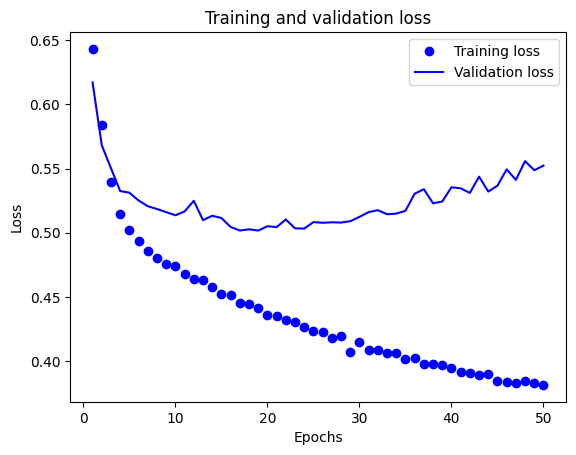

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

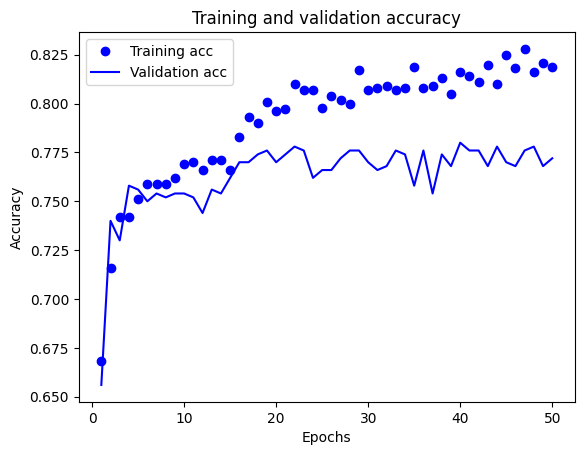

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-3) [10 points] Revise your network and retrain using Callbacks.
 - [5] Try to use Dropout(0.5) layers after three hidden dense layers.
 - [5] Use Early Stopping callback with patience parameter 7 monitoring validation loss, and use ModelCheckpoint callbact to save the best model based on validation loss

In [ ]:
## Your model code here
# 드롭아웃 하려면 => **위에서 했던 functional api말고 sequential로 바꾸기!!!!!

model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=7
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_loss',
        save_best_only=True

    )
]

model.compile(optimizer="rmsprop",
              loss= 'binary_crossentropy',
              metrics=["accuracy"])

history = model.fit(x4train, y_train, epochs=50, batch_size=20, # 위에서 만든 거 그대로
                    validation_data=[x4val,y_val],
                    callbacks=callbacks # 이거 꼭 넣어주기 !!!!!!!!!


)


Epoch 1/50
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7494 - loss: 0.5532

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7497 - loss: 0.5495 - val_accuracy: 0.7620 - val_loss: 0.5211
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7647 - loss: 0.5303 - val_accuracy: 0.7640 - val_loss: 0.5239
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7569 - loss: 0.4908 - val_accuracy: 0.7660 - val_loss: 0.5264
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7583 - loss: 0.5482 - val_accuracy: 0.7660 - val_loss: 0.5236
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7571 - loss: 0.5131 - val_accuracy: 0.7680 - val_loss: 0.5270
Epoch 6/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7676 - loss: 0.4881

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7671 - loss: 0.4889 - val_accuracy: 0.7660 - val_loss: 0.5198
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7554 - loss: 0.5244 - val_accuracy: 0.7620 - val_loss: 0.5241
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7751 - loss: 0.4933 - val_accuracy: 0.7660 - val_loss: 0.5232
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7925 - loss: 0.4873 - val_accuracy: 0.7600 - val_loss: 0.5299
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7676 - loss: 0.5428 - val_accuracy: 0.7720 - val_loss: 0.5228
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4817 - val_accuracy: 0.7500 - val_loss: 0.5324
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7418 - loss: 0.4941 - val_accuracy: 0.7680 - val_loss: 0.5205
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7507 - loss: 0.5052 - val_accuracy: 0.7740 - val_loss: 0.5238

You may want to check history. The results won't be exactly the same, but they will be similar.

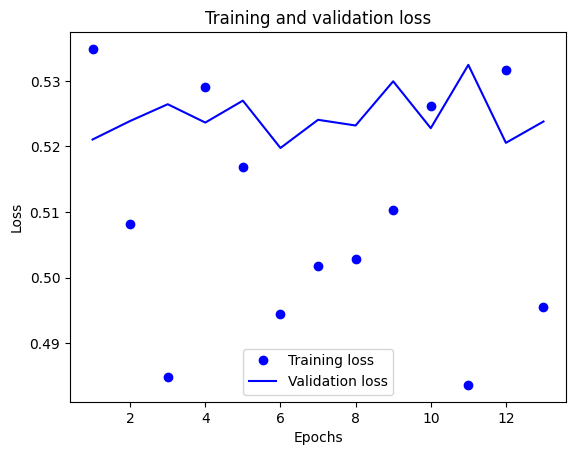

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

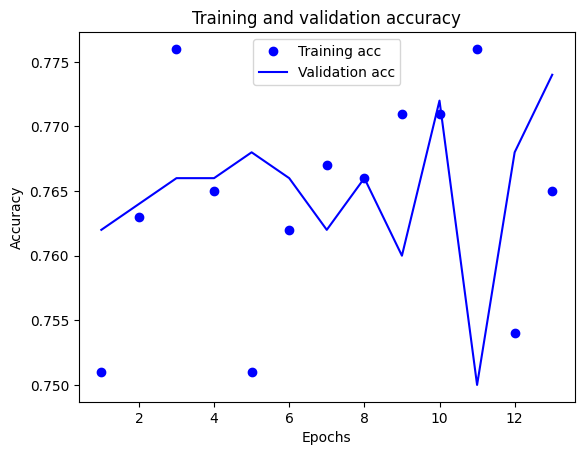

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-4) [5 points] Load the saved best model and evaluate the model on test data.

In [ ]:
## Your code here
best_model = keras.models.load_model('best_model.h5')
best_model.evaluate(x4test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8042 - loss: 0.4836


[0.49401769042015076, 0.8004385828971863]

#### (Q2-4) [10 points] Consider additional input feature, wold length feature. Make a multi-input model.
  - we can calculate wordlength feature using the code below
  - Using the multi-hot encoded reply_input feature(X4train, X4val, X4test) and chrlength feature (chrlength_train, chrlength_val, chrlength_test), try to make a multi-input model like below.

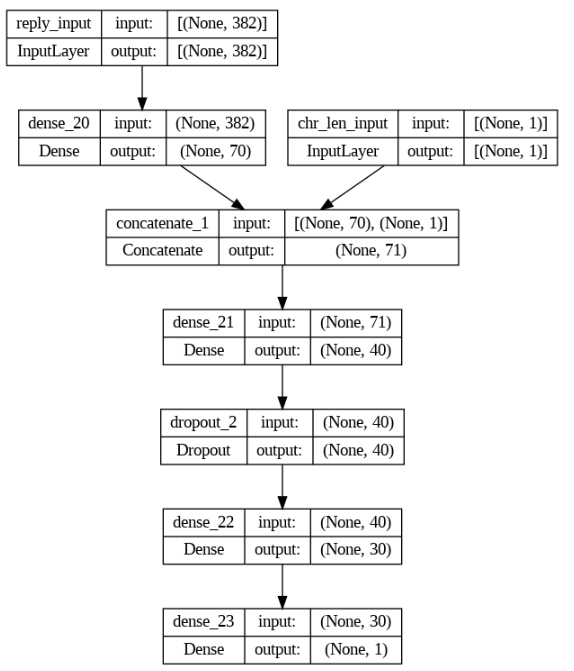

New chrlength feature is defined below. It is just a length of string normalized by maximum chrlength value.

In [ ]:
X_ori = youtube_spam_collection.data.features.iloc[idx,2]
chrlength_text = np.array([ len(X_ori[i]) for i in range(len(X_ori)) ])
max_len = chrlength_text.max()

chrlength_train = chrlength_text[:1000]/max_len
chrlength_val = chrlength_text[1000:1500]/max_len
chrlength_test = chrlength_text[1500:]/max_len


In [ ]:
## Define your multi-input model here

reply_input = keras.Input(shape=(len(word_index),),name='reply_input') # 382 input
word_len_input = keras.Input(shape=(1,),name='word_len_input')

dense1 = layers.Dense(70, activation='relu')(reply_input)
concat_layer = layers.Concatenate()([dense1, word_len_input])

dense2 = layers.Dense(40, activation='relu')(concat_layer)

dr = layers.Dropout(0.5)(dense2) # 그냥 바로 드롭아웃 층 넣기!!!!!! dense 하나 더 안 넣어도 됨!!!!!

dense3 = layers.Dense(30, activation = 'relu')(dr)

output = layers.Dense(1, activation='sigmoid')(dense3)

model = keras.Model(inputs=[reply_input, word_len_input], outputs=output)


In [ ]:
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ reply_input         │ (None, 382)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 70)        │     26,810 │ reply_input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ word_len_input      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 71)        │          0 │ dense_40[0][0],   │
│ (Concatenate)       │                   │            │ word_len_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 40)        │      2,880 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 40)        │          0 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 30)        │      1,230 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │         31 │ dense_42[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 30,951 (120.90 KB)

 Trainable params: 30,951 (120.90 KB)

 Non-trainable params: 0 (0.00 B)

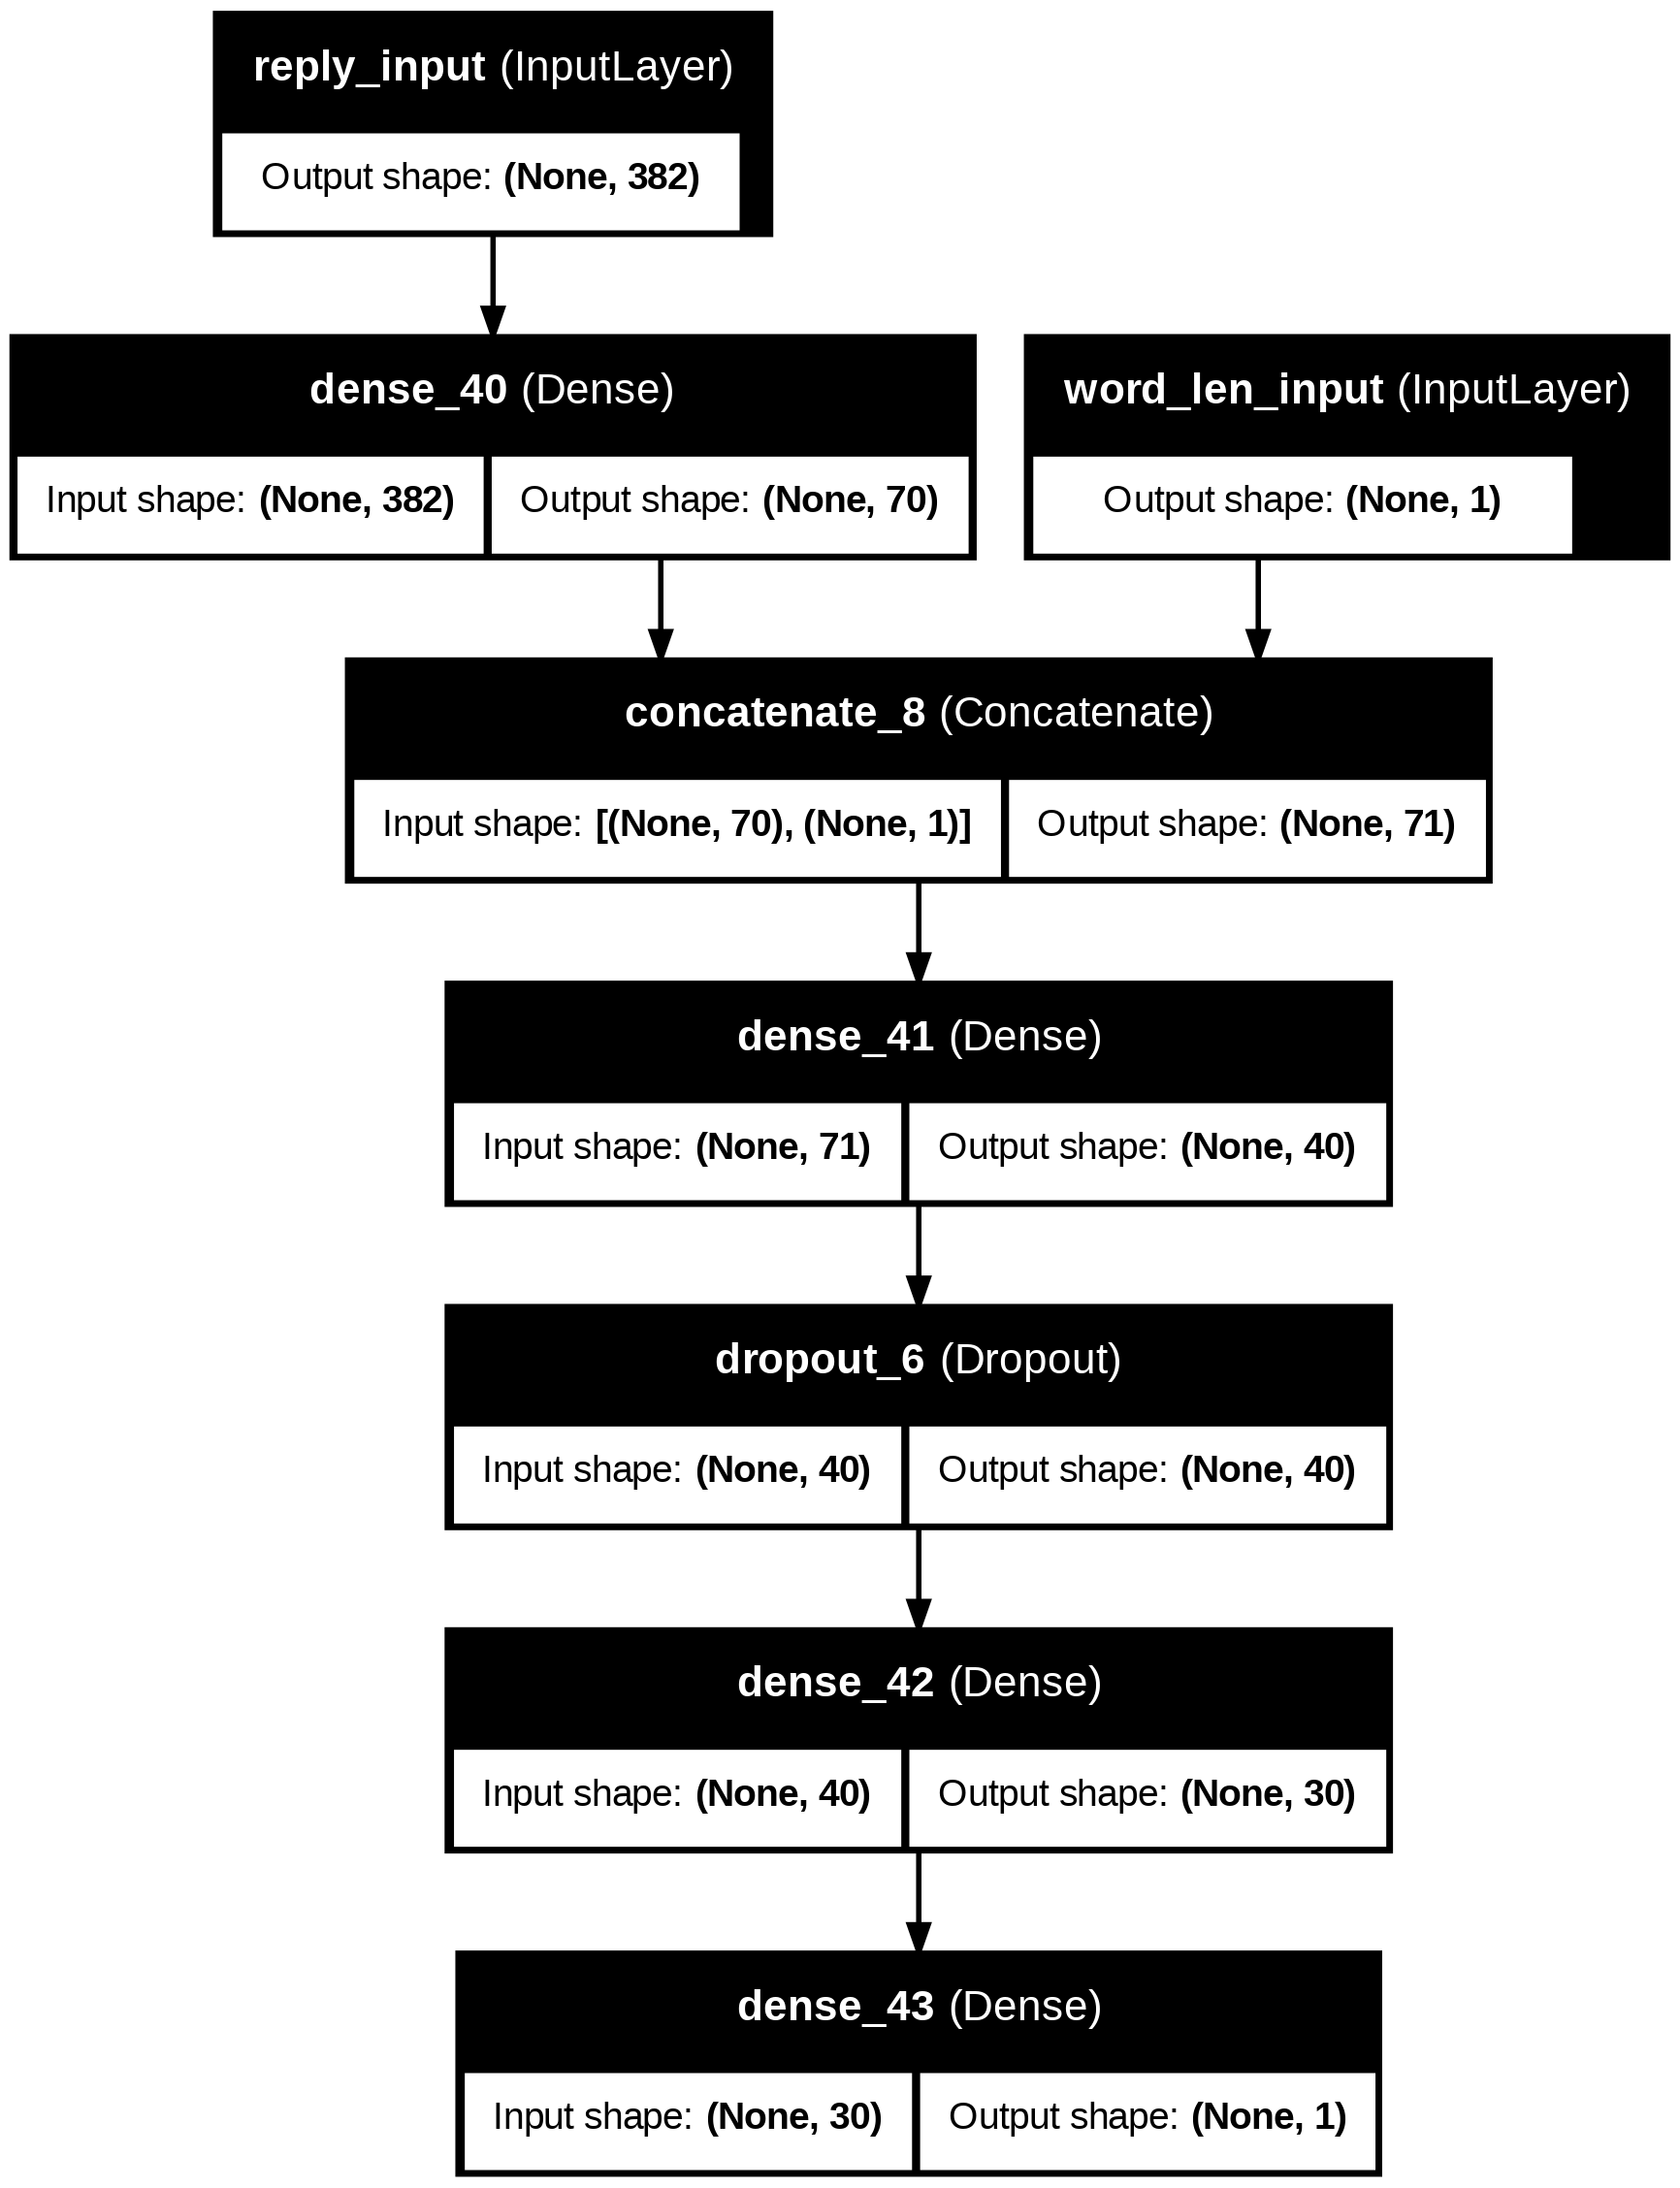

In [ ]:
## If you define right, the result should look like below.
keras.utils.plot_model(model, "spam_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)

#### (Q2-5) [5 points] Train and evaluate multi-input model
  - For compile, use RMSprop, specify metrics as accuracy. Use ModelCheckpoint callback saving a best model based on validation loss.
  - For training, train 100 number of epochs, using batch size 20. Use x4val, chrlength_val, and y_val for your validation data.
  - Finally, evaluate your model on test dataset.

In [ ]:
## Your code here

callbacks = [keras.callbacks.ModelCheckpoint(filepath = 'checkpoint_path.keras', monitor = 'val_loss', save_best_only=True)
]

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
              )

history = model.fit([x4train, chrlength_train], y_train, epochs=100, batch_size=20,
                    callbacks=callbacks,
                    validation_data = ([x4val, chrlength_val], y_val)
)


Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6094 - loss: 0.6735 - val_accuracy: 0.7480 - val_loss: 0.6198
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7339 - loss: 0.5978 - val_accuracy: 0.7600 - val_loss: 0.5511
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7272 - loss: 0.5449 - val_accuracy: 0.7660 - val_loss: 0.5255
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 0.5250 - val_accuracy: 0.7580 - val_loss: 0.5170
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7524 - loss: 0.5125 - val_accuracy: 0.7520 - val_loss: 0.5200
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7490 - loss: 0.5184 - val_accuracy: 0.7700 - val_loss: 0.5175
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7691 - loss: 0.4741 - val_accuracy: 0.7660 - val_loss: 0.5139
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7428 - loss: 0.5137 - val_accuracy: 0.7680 -

In [ ]:
## Load the best model, and evaluate on test datasets.
best_model = keras.models.load_model('checkpoint_path.keras')
best_model.evaluate([x4test, chrlength_test], y_test)
## Your code here

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8066 - loss: 0.4477


[0.4619872570037842, 0.7982456088066101]